In [1]:
import os
import glob
import matplotlib.pyplot as plt

from vrlatency.analysis import read_csv, transform_display_df, shift_by_sse, plot_display_figures

## Import Data

In [2]:
path_data = "../../data/"
path_fig = "../../Figures/display/"

os.chdir(path_data)

In [3]:
filenames = []
for ind, filename in enumerate(glob.glob('*.csv')):
    filenames.append(filename)
    print(filename)

display_20180830_115317.csv
display_20180830_123133.csv
display_20180830_123445.csv
display_20180830_124007.csv
display_20180830_124242.csv
display_20180830_175009.csv
display_20180830_175220.csv
display_20180830_175249.csv
display_20180830_175922.csv
display_20180830_175944.csv
display_20180830_175957.csv
display_20180830_180145.csv
display_20180830_180216.csv
display_20180830_180339.csv
display_20180830_180657.csv
display_20180830_181301.csv
display_20180830_181639.csv
display_20180830_182344.csv
display_20180830_182735.csv
display_20180830_183236.csv
display_20180830_183706.csv
display_20180830_184108.csv
display_20180830_184346.csv
display_20180830_184633.csv
display_20180830_184938.csv
display_20180830_185858.csv
display_20180830_190230.csv
display_20180830_191215.csv


### Choose a file and display it

In [4]:
filename = filenames[16]
filename

'display_20180830_181639.csv'

In [5]:
df = read_csv(filename)
df.head()

,Trial,Time,SensorBrightness
0,2,1578364,5
1,2,1578636,5
2,2,1578908,5
3,2,1579180,5
4,2,1579452,4


In [6]:
thresh = .8
session_name = filename.split('.')[0]
df_transformed = transform_display_df(df, session=session_name, thresh=thresh)
df_transformed.head()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc
0,display_20180830_181639,2,0,1578.364,0.000,5,25.416,-25.416,0.8
1,display_20180830_181639,2,1,1578.636,0.272,5,25.416,-25.144,0.8
2,display_20180830_181639,2,2,1578.908,0.544,5,25.416,-24.872,0.8
3,display_20180830_181639,2,3,1579.180,0.816,5,25.416,-24.600,0.8
4,display_20180830_181639,2,4,1579.452,1.088,4,25.416,-24.328,0.8


In [7]:
df_shifted = shift_by_sse(df_transformed.copy())
df_shifted.head()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc
0,display_20180830_181639,2,0,1578.364,0.000,5,25.416,-26.776,0.8
1,display_20180830_181639,2,1,1578.636,0.272,5,25.416,-26.504,0.8
2,display_20180830_181639,2,2,1578.908,0.544,5,25.416,-26.232,0.8
3,display_20180830_181639,2,3,1579.180,0.816,5,25.416,-25.960,0.8
4,display_20180830_181639,2,4,1579.452,1.088,4,25.416,-25.688,0.8


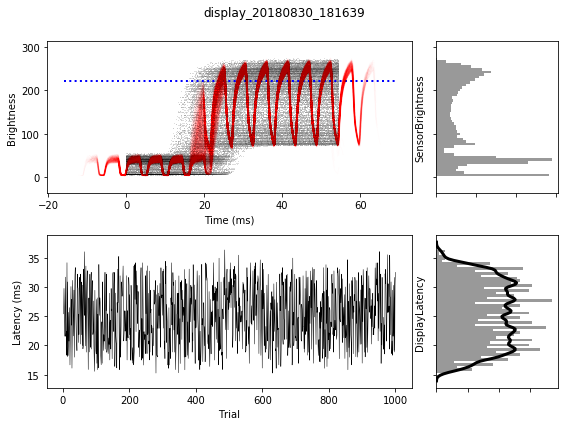

In [8]:
plot_display_figures(df_shifted)
plt.show()